In [2]:
# IMPORTS
from functions_q1 import *

In [2]:
# DOWNLOAD ALL THE LINKS
anime = get_anime_list()

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [05:10<00:00,  1.29it/s]


In [4]:
# SAVE RESULTS AS TXT FILE
save_anime_list(anime)

In [2]:
# CREATE THE DIRECTORIES
create_folders()

In [8]:
# IMPORT FILE
anime_list = load_anime_list()

# CHIECK MISSING HTMLS (HTMLS TO DOWNLOAD)
missing_files = get_missing_htmls(anime_list)
print(f'Missing: {len(missing_files)} html files')

# PARRALELIZE (IF NEEDED) THE DOWNLOAD 
out = Parallel(n_jobs=1, verbose=10)(delayed(get_html_page)(index, sub_dir, url) for index, sub_dir, url in missing_files)
    
# CHECK THAT ALL HTMLS ARE DOWNLOADED
check_missing_files(out)

Missing: 0 html files


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   0 out of   0 | elapsed:    0.0s finished


**Note**: All the files were previusly computed. So, in this run, no missing files were found

In [3]:
anime_list = load_anime_list()
get_missing_htmls(anime_list)
check_missing_files(
    get_missing_htmls(anime_list)
    )

In [9]:
# ZIP THE FOLDERS
zip_folders('htmls')

In [4]:
# 1.3 - PARSE DOWNLOADED PAGES
base_path = './htmls'

# COMPUTE .tsv FILE
compute_tsv_files(base_path, anime_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5

In [4]:
# ZIP THE FOLDERS
zip_folders('htmls_and_tsv')

In [3]:
df = get_dataset('./htmls')

DATASET - LOADED


In [5]:
# CREATE A .csv FILE OF THE DATASET
df.to_csv('./q2_dataset.csv', index=False)

# 2. Search Engine

In [4]:
# IMPORT THE FUNCTIONS
from functions_q2 import *

In [5]:
start = time.time()
df['animeDescription'] = np.vectorize(preprocess)(df['animeDescription'])
print('Preprocessing time: ', round(time.time() - start, 2))

Preprocessing time:  679.97


- ### 2.1.1) Create your index!

In [6]:
docs = df['animeDescription'].values
inverted_index = get_inverted_index(docs)  

100%|██████████████████████████████████████████████████████████████████████████| 19132/19132 [00:05<00:00, 3775.26it/s]


In [7]:
print(query('after', inverted_index))

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.72it/s]

[0, 2, 2053, 5, 8198, 12295, 2059, 17, 18, 19, 2069, 10262, 4124, 4127, 2080, 6176, 14372, 6182, 39, 2087, 6183, 6185, 12328, 18470, 46, 2095, 2097, 50, 2098, 10289, 14386, 18487, 2104, 57, 10300, 2109, 18495, 66, 68, 18501, 6215, 2121, 74, 4169, 2131, 18518, 8280, 89, 2140, 18528, 97, 6242, 2148, 6245, 104, 2152, 8302, 4207, 4208, 10353, 116, 117, 2169, 10362, 123, 8316, 4220, 4225, 130, 14466, 2180, 6276, 2182, 135, 16517, 18562, 4236, 2190, 2191, 2195, 2197, 2198, 4245, 10391, 10392, 2205, 159, 10400, 2209, 2212, 165, 2215, 168, 6314, 2219, 172, 177, 2226, 6322, 2231, 4280, 188, 2236, 4286, 6332, 6333, 18620, 18622, 4291, 6339, 2245, 4293, 18623, 18626, 10444, 2255, 6351, 209, 8401, 2259, 18639, 16597, 215, 221, 10461, 223, 10462, 225, 227, 2276, 8421, 230, 6375, 6377, 234, 235, 6380, 240, 2289, 10482, 4339, 8435, 2293, 10483, 249, 2297, 2298, 2299, 16639, 261, 263, 264, 18698, 2319, 12559, 10513, 274, 2322, 4370, 277, 4371, 4375, 14612, 14613, 2330, 6427, 2341, 6437, 18729, 6443, 8

**Second inverted index**

In [10]:
tfidf_inverted_index = {}
N = len(list(inverted_index.keys()))
idf_vec = []

for word in inverted_index.keys():
    idf = np.log2(N/len((inverted_index[word])))
    idf_vec.append(idf)
    
for idx, word in enumerate(inverted_index.keys()): # iterate over all words
    # tfidf_inveted_index[word] should be [(document1, tfIdf(word,d1), (word, tfIdf(term,d2)), ...]
    # idf = np.log2(N/len((inverted_index[word]))) # Compute the idf for each word
    tfidf_vec = [] # tfidf vec for each word
    
    for index, doc in enumerate(docs):
        try:
            tf = doc.count(word)/len(doc.split()) # Number of repetitions of word in a document) / (# of words in a document
            tfidf_vec.append((index, tf * idf_vec[idx])) # Append for this document
        except ZeroDivisionError:
            pass
        
    tfidf_inverted_index[word] = tfidf_vec
    
d = transform_to_df(tfidf_inverted_index)
df2 = pd.DataFrame(d)
print(df2)

KeyboardInterrupt: 

In [ ]:
QUERY = 'after'
query_tfidf = compute_new_tfidf(QUERY, tfidf_inverted_index, inverted_index)
print(query_tfidf)

In [ ]:
containig_docs = query(QUERY, inverted_index)

In [ ]:
tuples = []
for doc_id in containig_docs:
    doc_tfidf = df.loc[doc_id].values
    cs = cosine_similarity(query_tfidf, doc_tfidf)
#     tuples.append((cs, doc_id))
    heappush(tuples, (-cs, doc_id)) #( just to do it like a max heap, this is where the - comes fr
print(tuples)

In [ ]:
k = len(containig_docs)
top_k = []
for _ in range(k):
    top_k.append(heappop(tuples))
top_k = [(-tuple[0], tuple[1]) for tuple in top_k]
print('Top k: ', top_k)   # array of pairs (s, id) where is is the similarity and id is the doc id

top_k_docids = [pair[1] for pair in top_k]
top_k_similarities = [pair[0] for pair in top_k]


In [ ]:
df_res = df2.loc[top_k_docids, ['animeTitle', 'animeDescription']] # add animeUrl when in the DF! 
df_res['Similarity'] = top_k_similarities
df_res


# 3. Define a new score!

In [ ]:
QUERY = {'animeType': 'TV', 'animeNumEpisode': 10, 'endDate': 1, 'animeNumMembers': 12, 'animeScore': 12, 'animeUsers': False,
             'animeRank': False, 'animePopularity': 12}

# filtered_df = df2.loc[containig_docs]
# filtered_df['desc_similarity'] = top_k_similarities


# Preprocess end date
df2 = df2.loc[top_k_docids, :] # add animeUrl when in the DF! 
df2['tfidf'] = top_k_similarities


df2['endDateBool'] = df2['endDate'].apply(lambda x: 1 if x.value > 0 else 0)

df2['animeType'] = df2['animeType'].astype('category')

df2['endDateHamming'] = df2['endDateBool'].apply(lambda x: 1 if x == QUERY['endDate'] else 0)
df2['animeTypeHamming'] = df2['animeType'].apply(lambda x: 1 if x.lower() == QUERY['animeType'].lower() else 0)

curr_vec = [QUERY['animePopularity'], QUERY['animeScore'], QUERY['animeNumMembers'], QUERY['animeNumEpisode']]

def eucl(a, b):
    return np.linalg.norm(a-b)
def new_score(row):
    euclid, hamming, tfidf = row
    euclidean_index = euclid**-1
    hamming_index = np.log(1 + hamming)**-1
    new_score = tfidf * euclidean_index * hamming_index
    
    return new_score    

s = df2['animePopularity'].mean()
d = df2['animePopularity'].std()
QUERY['animePopularity'] = (QUERY['animePopularity'] - s)/d

s = df2['animeScore'].mean()
d = df2['animeScore'].std()
QUERY['animeScore'] = (QUERY['animeScore'] - s)/d

s = df2['animeNumMembers'].mean()
d = df2['animeNumMembers'].std()
QUERY['animeNumMembers'] = (QUERY['animeNumMembers'] - s)/d

s = df2['animeNumEpisode'].mean()
d = df2['animeNumEpisode'].std()
QUERY['animeNumEpisode'] = (QUERY['animeNumEpisode'] - s)/d


df2['animePopularity'] =(df2['animePopularity']-df2['animePopularity'].mean())/df2['animePopularity'].std()
df2['animeScore'] =(df2['animeScore']-df2['animeScore'].mean())/df2['animeScore'].std()
df2['animeNumMembers'] =(df2['animeNumMembers']-df2['animeNumMembers'].mean())/df2['animeNumMembers'].std()
df2['animeNumEpisode'] =(df2['animeNumEpisode']-df2['animeNumEpisode'].mean())/df2['animeNumEpisode'].std()

Z = df2[['animePopularity', 'animeScore','animeNumMembers', 'animeNumEpisode']].values
df2['euclidean_distance'] = [eucl(curr_vec, z) for z in Z]

df2['hamming_distance'] = df2['endDateHamming'] + df2['animeTypeHamming']
df2['newScore'] = df2[['euclidean_distance', 'hamming_distance', 'tfidf']].apply(new_score, axis=1)
df2

In [ ]:
doc_ids = df2.index

tuples = []
for doc_id in doc_ids:
    score = df2.loc[doc_id, 'newScore']
#     tuples.append((cs, doc_id))
    heappush(tuples, (-score, doc_id)) #( just to do it like a max heap, this is where the - comes fr
print(tuples)

k = df2.shape[0]
top_k = []
for _ in range(k):
    top_k.append(heappop(tuples))
top_k = [(-tuple[0], tuple[1]) for tuple in top_k]
# print('Top k: ', top_k)   # array of pairs (s, id) where is is the similarity and id is the doc id

top_k_docids = [pair[1] for pair in top_k]
top_k_similarities = [pair[0] for pair in top_k]

df_res = df2.loc[top_k_docids, ['animeTitle', 'animeDescription']] # add animeUrl when in the DF! 
df_res['Similarity'] = top_k_similarities
df_res

In [ ]:
df2[['tfidf', 'newScore']].plot.scatter(x='tfidf', y='newScore')

# 4. BONUS: Understanding the anime's reviews

For the bouns question, we created a new scores accordig to the values of ***polarity*** and ***subjectivity*** provided by the library **textblob**.

Textblob is a very simple and useful python library which provides interesting tools for sentiment analysis. With the support of **nltk** (used in Q2) for the data pre-processing, IT RETURNS 2 SCORES:

1. **Polarity**: The polarity score is a float within the range [-1.0, 1.0] where -1.0 means *negative* and 1.0 means * positive* whereas 0 means *neutral*.
2. **Subjectivity**: The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

For each review, according to these two indexes, we create a new one as following:

$newScore = polarity * (1 + log_2(2 - subjectivity))$

So, we "adjust" the *polarity* with the *subjectivity*. The idea behind this choice is that an objective review should be a bit more important than a very personal (subjective) review. we use $log_2$ to to level out the subjectivity and for breaking the linearity and accentuate extreme values(i.e. for value between 0.0 and 1.0 the result of $2 - subjectivity$ must be between 1 and 2. Applying $log_2$ transformation we will have values in the range of [0.0, 1.0] with values more close to the edges).

We calculate the score for each review of the anime and then get a mean value. If less than 5 reviews are retrived, a penalty is added, where the penalty is $# of reviews / # of expected revies$. So, if no reviews are retrieved, a score of 0.0 is garanteted.

In [8]:
# IMPORTING LIBRARIES
from functions_q4 import *
from pandas.plotting import scatter_matrix

In [4]:
# RETRIEVE TOP 5 REVIEWS FOR EACH ANIME PAGE
get_reviews()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1775s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0170s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0150s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0150s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 288 t

[Parallel(n_jobs=-1)]: Done 15581 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 15704 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 15829 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 15954 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 16081 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 16208 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 16337 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 16466 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 16597 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 16728 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 16861 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 16994 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 17129 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 17264 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 17401 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 17538 tasks 

In [3]:
# GET THE DATASET FOR Q4 (WE USED PARALLELIZATION FOR NEW SCORE COMPUTING)
new_df = get_new_dataset()

DATASET - LOADED


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1742s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0250s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0280s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0360s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 224 t

In [4]:
# PLOTTING THE HEAD OF THE NEW DATASET
new_df.head()

,animeTitle,animeType,animeNumEpisode,releaseDate,endDate,animeNumMembers,animeScore,animeUsers,animeRank,animePopularity,animeDescription,animeRelated,animeCharacters,animeVoices,animeStaff,Url,newScore
0,Fullmetal Alchemist: Brotherhood,TV,64,2009-04-05,2010-07-04,2677162,9.161,16290511,1,3,After a horrific alchemy experiment goes wrong...,[Fullmetal Alchemist: The Sacred Star of Milos...,"[Elric, Edward, Elric, Alphonse, Mustang, Roy,...","[Park, Romi, Kugimiya, Rie, Miki, Shinichiro, ...","[[Cook, Justin, Producer], [Yonai, Noritomo, P...",https://myanimelist.net/anime/5114/Fullmetal_A...,0.000000
1,Gintama: The Final,Movie,1,2021-01-08,NaT,79537,9.001,2997929,10,1924,New Gintama movie.,"[Gintama: The Semi-Final, Gintama, Gintama.: S...","[Sakata, Gintoki, Kagura, Shimura, Shinpachi, ...","[Sugita, Tomokazu, Ishida, Akira, Hino, Satoshi]","[[Fujita, Youichi, Director], [Miyawaki, Chizu...",https://myanimelist.net/anime/39486/Gintama__T...,0.000000
2,Gintama. (Gintama Season 5),TV,12,2017-01-09,2017-03-27,246322,8.981,108581108,11,727,After joining the resistance against the bakuf...,"[Gintama, Gintama.: Porori-hen, Gintama°]","[Sakata, Gintoki, Kagura, Katsura, Kotarou, Ta...","[Sugita, Tomokazu, Kugimiya, Rie, Ishida, Akir...","[[Fujita, Youichi, Director], [Miyawaki, Chizu...",https://myanimelist.net/anime/34096/Gintama\n,0.000000
3,3-gatsu no Lion 2nd Season (March Comes In Lik...,TV,22,2017-10-14,2018-03-31,324437,8.971,155163155,12,529,"Now in his second year of high school, Rei Kir...","[3-gatsu no Lion, Lion meets HachiClo]","[Kiriyama, Rei, Kawamoto, Hinata, Kawamoto, Ak...","[Kawanishi, Kengo, Hanazawa, Kana, Kayano, Ai,...","[[Shinbou, Akiyuki, Director, Series Compositi...",https://myanimelist.net/anime/35180/3-gatsu_no...,0.095963
4,Koe no Katachi (A Silent Voice),Movie,1,2016-09-17,NaT,1780426,8.971,12089901,13,23,"As a wild youth, elementary school student Sho...","[Koe no Katachi, Koe no Katachi Specials]","[Nishimiya, Shouko, Ishida, Shouya, Nishimiya,...","[Hayami, Saori, Irino, Miyu, Yuuki, Aoi, Kanek...","[[Senami, Riri, Assistant Producer], [Yamada, ...",https://myanimelist.net/anime/28851/Koe_no_Kat...,0.000000


In [5]:
# PLOTTING THE TOP 10 ANIME ACCORDING TO THE NEW SCORE (DESCENDING)
new_df[['animeTitle', 'animeNumEpisode', 'animeRank','newScore']].sort_values(by='newScore', ascending=False).head(10)

,animeTitle,animeNumEpisode,animeRank,newScore
15364,Damen's Walker,12,15376,0.609944
3998,Magic Tree House,1,4001,0.605543
16554,Kaminari Boy Pikatta-kun no Koutsu Anzen,1,16566,0.588130
16419,Jitensha ni Notte.,1,16431,0.575446
13798,The Gift,1,13811,0.567240
10786,SD Gundam Force,52,10797,0.558056
12862,Pugpug,4,12877,0.550748
11297,Idolls!,10,11307,0.547558
8555,Kishin Houkou Demonbane,1,8562,0.539483
13278,Shinkansen Henkei Robo Shinkalion Z the Animation,-1,13291,0.538944


In [6]:
# CORRELETION OF THE NEW SCORE
new_df[['animeNumEpisode', 'newScore']].corr()

,animeNumEpisode,newScore
animeNumEpisode,1.000000,-0.018706
newScore,-0.018706,1.000000


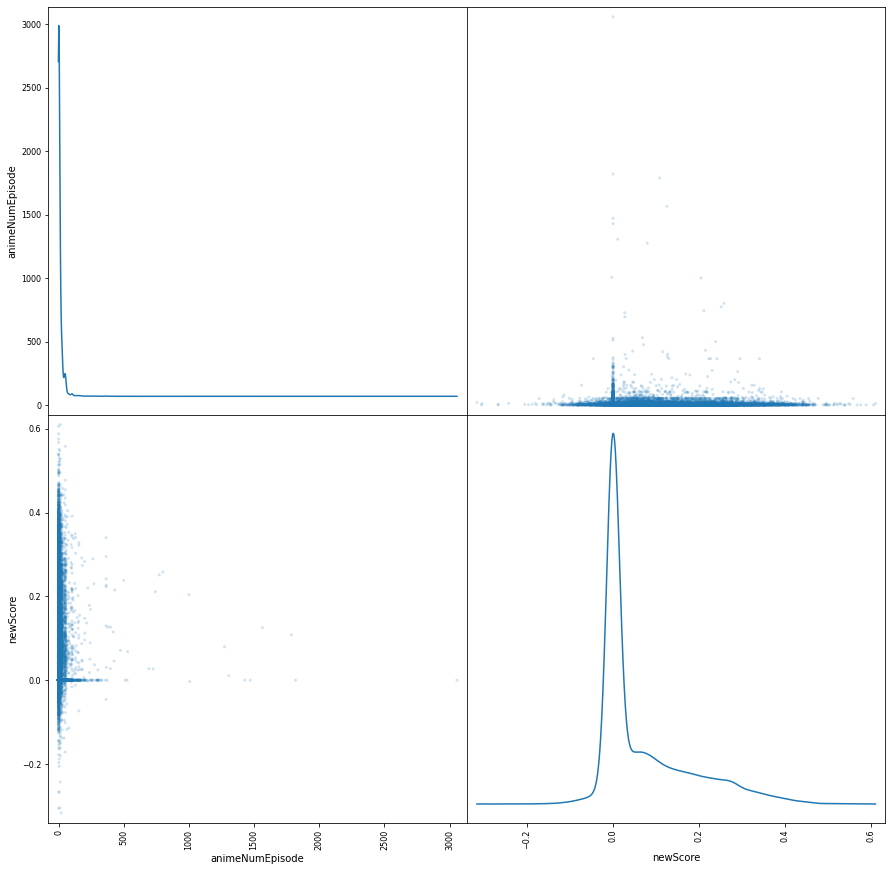

In [9]:
# PLOTTING DENSITY PLOT AND SCATTER PLOT OF THE 2 FEATURES: 'animeNumberEpisode' AND 'newScore'
scatter_matrix(new_df[['animeNumEpisode', 'newScore']], alpha=0.2, figsize=(15, 15), diagonal="kde");

### Comment about "animeNumEpisode" and "newScore"
The correlation above shows no correlation between **animeNumEpisode** and **newScore**. The plot below proves that any kind of particular correlation between these two features is provided. The only effect that we can note is that the variability of **newScore** decreases when the number of episode increases.

<AxesSubplot:xlabel='animeNumEpisode', ylabel='newScore'>

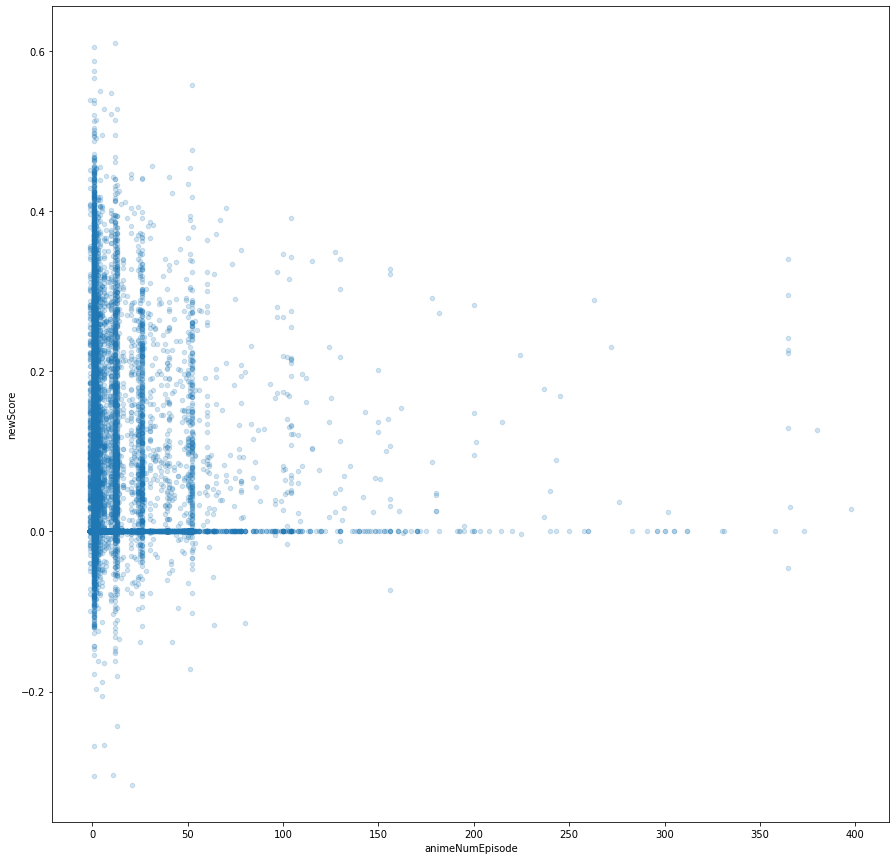

In [11]:
# ZOOM OF THE PREVIOUS SCATTER PLOT
filtered_df = new_df[['animeNumEpisode', 'newScore']]\
    .query('animeNumEpisode < 400')

filtered_df.plot.scatter(x='animeNumEpisode', y='newScore', alpha=0.2, figsize=(15, 15))

### Comparison with animeScore

The plot below shows the distribution of the two features: **animeScore** and **newScore**. As we can see, the two variable are indipendent. This is due to the fact that:

1.The new score is computed only on the sentiment of the first 5 reviews for each anime. Probabily we need more reviews to have a more *"robust"* index (more reviews also decrease the effect of missing reviews. In fact, with 50 reviews as target, ifwe retrieve only 48 reviews, the penalization is less important.

2. The model lacks in accuracy. We have no particular evidence of the model performance, but it could be reasonable that it could be imporoved with a training on this kind of topic.



<AxesSubplot:xlabel='animeScore', ylabel='newScore'>

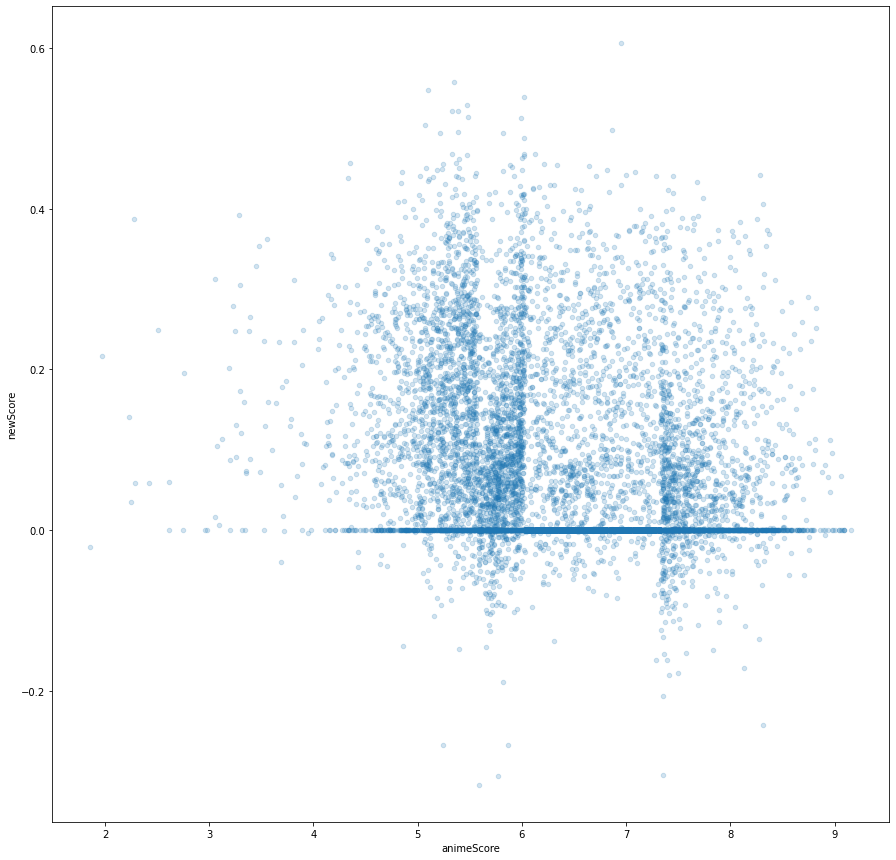

In [12]:
# SCATTER PLOT OF THE 2 FEATURES: 'animeScore' AND 'newScore' (FILTERING ROWS WITH MISSING SCORES)
new_df[['newScore', 'animeScore']].query('animeScore > 0')\
    .plot.scatter(x='animeScore', y='newScore', alpha=0.2, figsize=(15, 15))